In [1]:
#!pip install tabulate

In [ ]:
import pandas as pd

# Load the mnist_test.csv file into a Pandas DataFrame

df = pd.read_csv("mnist_test_nolabels.csv")
print("Successfully loaded mnist_test_nolabels.csv into DataFrame df.")

# Display the first 5 rows of the DataFrame
display(df.head(5))

# Print the shape of the DataFrame
print(f"DataFrame shape: {df.shape}")

In [3]:
if df is not None:
    # Create a numpy array of the first 5 rows
    first_five_rows_no_label = df.head(5).values

    print("\nFirst 5 rows as a NumPy array:")
    print(f"Shape of the numpy array: {first_five_rows_no_label.shape}")


First 5 rows as a NumPy array:
Shape of the numpy array: (5, 784)


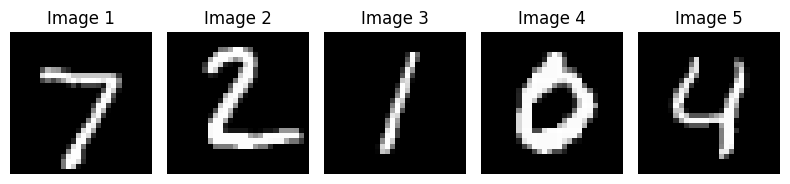

In [ ]:
import matplotlib.pyplot as plt

# Reshape each row into a 28x28 image and display them
plt.figure(figsize=(8, 5))  # Adjust figure size for better visualization
for i in range(5):
    img = first_five_rows_no_label[i].reshape(28, 28)  # Reshape row
    plt.subplot(1, 5, i + 1)  # Create subplot for each image
    plt.imshow(img, cmap='gray')  # Display the image in grayscale
    plt.title(f"Image {i + 1}")
    plt.axis('off')  # Turn off axis labels
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
import numpy as np

# gaussian filters
gauss = np.array([
    [1/16,  2/16,  1/16],
    [2/16,  4/16,  2/16],
    [1/16,  2/16,  1/16]
])
# laplacian filters
lapl = np.array([
    [0,  1,  0],
    [1,  -4,  1],
    [0,  1,  0]
])

# sobel filters
sobel_x = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
])
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])


# prewitt filters
prewitt_x = np.array([
    [-1,  0,  1],
    [-1,  0,  1],
    [-1,  0,  1]
])
prewitt_y = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

Shape of convolved images array: (5, 26, 26)
Data type of convolved images array: float64


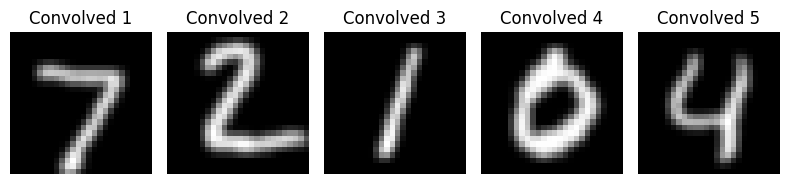

In [ ]:
import numpy as np
from scipy.signal import convolve2d

# Apply convolution to each reshaped row (image)

# Box-Blur filter
k = 7
convolved_images = []
filter_kernel = np.ones((k, k))/(k**2)  # k x k filter initialized with 1/9s

for i in range(5):
    img = first_five_rows_no_label[i].reshape(28, 28)
    # convolved_img = convolve2d(img, filter_kernel, mode='valid')  # Use 'valid' mode for no padding
    convolved_img = convolve2d(img, gauss[:,::-1], mode='valid')
    convolved_images.append(convolved_img)

# Convert the list of convolved images to a NumPy array
convolved_images_array = np.array(convolved_images)

# Print diagnostic information about the new array
print(f"Shape of convolved images array: {convolved_images_array.shape}")  # (5, 27, 27) because of 'valid' mode
print(f"Data type of convolved images array: {convolved_images_array.dtype}")

# Display the convolved images
plt.figure(figsize=(8, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(convolved_images_array[i], cmap='gray')
    plt.title(f"Convolved {i + 1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Can you now use these vectors created form convolutions to perform specific ML tasks like creating a similarity heatmap, clustering, etc.

## Conventional Image Vectorization Methods

| **Category**                  | **Method**                          | **Description**                                                                                                                                           |
|:------------------------------|:-------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Color Features**           | Color Histograms                    | Represents color distribution in an image; useful when color is a distinguishing factor. Invariant to small pose and scale changes.                       |
| **Texture Features**         | Gray-Level Co-occurrence Matrix (GLCM) | Captures spatial relationships between pixel intensities. Haralick features (contrast, correlation, energy) are derived from GLCMs.                      |
|                              | Local Binary Patterns (LBP)         | Describes local texture by comparing a pixel with its neighbors. Robust to illumination changes.                                                         |
|                              | Gabor Filters                       | Sensitive to specific orientations and frequencies. Effective for analyzing texture.                                                                      |
| **Edge and Shape Features**  | Edge Detection (Canny, Sobel)       | Identifies edges and outlines of objects in an image.                                                                                                     |
|                              | Histogram of Oriented Gradients (HOG) | Captures gradient orientation distributions in image regions. Effective for object detection (e.g., pedestrians).                                         |
|                              | Scale-Invariant Feature Transform (SIFT) | Detects local features invariant to scale and rotation.                                                                                                  |
|                              | Speeded-Up Robust Features (SURF)   | Faster alternative to SIFT with similar capabilities.                                                                                                     |
|                              | Corner Detection (Harris, etc.)     | Finds distinctive points (corners) in images.                                                                                                             |


## 3x3 convolution filters used in image processing.
These filters are fundamental in many computer vision tasks, especially for edge detection and blurring.

**1. Gaussian Blur Filter:**

* This filter smooths out noise and reduces image details.
* It uses a Gaussian distribution to assign weights to neighboring pixels, with the center pixel having the highest weight.
* A common 3x3 Gaussian kernel:
    * $$ \frac{1}{16} \begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix} $$

**2. Sobel Filters (Edge Detection):**

* These filters are used to detect edges in an image by approximating the image's gradient.
* They come in two versions: Sobel-X (detects vertical edges) and Sobel-Y (detects horizontal edges).
* Sobel-X:
    * $$ \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} $$
* Sobel-Y:
    * $$ \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} $$

**3. Prewitt Filters (Edge Detection):**

* Similar to Sobel filters, Prewitt filters detect edges by approximating gradients.
* They are generally simpler and faster than Sobel filters, but may be less accurate.
* Prewitt-X:
    * $$ \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} $$
* Prewitt-Y:
    * $$ \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix} $$

**4. Laplacian Filter (Edge Detection):**

* This filter is used to detect edges by calculating the second-order derivative of the image intensity.
* It's sensitive to noise and often used in combination with a Gaussian blur.
* A common Laplacian kernel:
    * $$ \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix} $$

**5. Box Blur Filter (Averaging Blur):**

* This filter performs a simple average of the pixels within the 3x3 window.
* It creates a uniform blurring effect.
* A common box blur kernel:
    * $$ \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix} $$

**Key Points:**

* The choice of filter depends on the specific image processing task.
* Edge detection filters highlight areas of rapid intensity change.
* Blurring filters reduce noise and smooth out details.
* These are used extensively in many image processing pipelines, and are the basis of many more complex operations.
